In [1]:
import numpy as np, tqdm
import matplotlib.pyplot as plt

from GifSaver import *

In [2]:
# Grid Resolution & Algorithm settings
Nx, Ny   = 800, 800  
max_iter = 100  

x_min, x_max = -2.0, 1.0
y_min, y_max = -1.5, 1.5

In [3]:
def draw_mndbrt_set(Nx, Ny, Z_init):
    """
    Draws the Maldenbrot set with given resolution and initial value

    Args:
        int:     Nx
        int:     Ny
        complex: Z_init

    returns:    
        np.array: Mandelbrot set visualization
    """

    x = np.linspace(x_min, x_max, Nx)
    y = np.linspace(y_min, y_max, Ny)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y 
    mandelbrot_image = np.zeros((Ny, Nx))

    Z = np.ones(C.shape, dtype = complex)*Z_init
    for i in range(max_iter):
        mask = np.abs(Z) <= 2
        Z[mask] = Z[mask]**2 + C[mask]
        mandelbrot_image += mask

    return mandelbrot_image

In [4]:
standart_mndbrt = draw_mndbrt_set(Nx, Ny, 0.0)

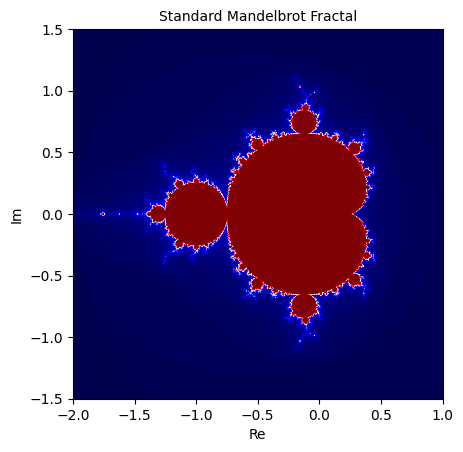

In [5]:
plt.imshow(standart_mndbrt, extent=(x_min, x_max, y_min, y_max), cmap='seismic')
plt.title("Standard Mandelbrot Fractal", fontsize = 10)
plt.xlabel("Re")
plt.ylabel("Im")
plt.show()

In [6]:
# Sequentially changing Z
Zs = np.linspace(0.0, 10e-1, 60)

results = [draw_mndbrt_set(400, 400, Zs[i]) for i in tqdm.tqdm(range(len(Zs)))]

100%|██████████| 60/60 [00:04<00:00, 12.46it/s]


In [7]:
# Saving Mandelbrot set evolution as GIF
save_GIF(results, output_file = 'Mandelbrot_Evolution.gif', cmap_ = 'seismic')